# Task 1

## By - Shikhar Kelkar

## Data Science and Business Analytics Intern

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
print("Libraries imported successfully")

Libraries imported successfully


### Importing data 

In [3]:
url="http://bit.ly/w-data"
df = pd.read_csv(url)

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#checking for correlations
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This Shows Hours and Scores are highly correlated

### Data Visualization

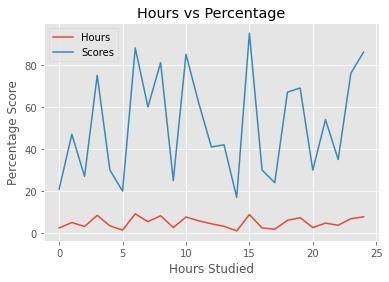

In [8]:
plt.style.use('ggplot')
df.plot(kind='line')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

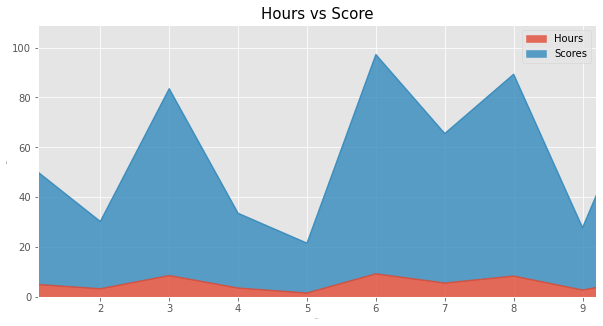

In [9]:
#Visualizing with area plot
xmin=min(df.Hours)
xmax=max(df.Hours)
df.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.title('Hours vs Score', size=15)
plt.xlabel('Hours',size=1.5)
plt.ylabel('Score', size=1.5)
plt.show()

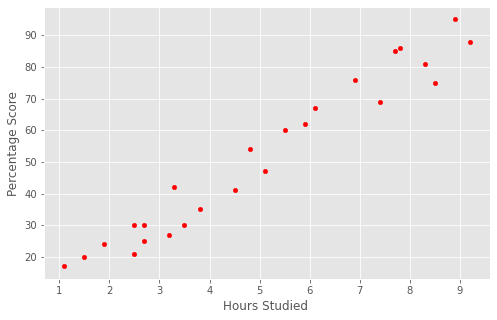

In [10]:
# Visualizing with scatter  plot
df.plot(kind='scatter',x='Hours',y='Scores',color='r',figsize=(8,5))
plt.title=('hours vs Percentage')
plt.xlabel('Hours Studied ')
plt.ylabel('Percentage Score')
plt.show()

## Modelling the data

In [11]:
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df['Scores'])


In [12]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

reg=LinearRegression()
reg.fit(x_train,y_train)

print('Training Completed\n')
print ('Coefficients :',reg.coef_)
print ('Intercept :',reg.intercept_)


Training Completed

Coefficients : [9.94061514]
Intercept : 1.5079104828268655


### Evaluation of the Model

    Mean Absolute Error: It is mean of absolute value of errors
    
    


In [13]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=reg.predict(x_test)
print('Mean Absolute Error : {} '.format(metrics.mean_absolute_error(y_pred,y_test)))
print("R2-score: %.2f" % r2_score(y_pred,y_test))
    

Mean Absolute Error : 4.877039354964483 
R2-score: 0.98


In [14]:
# Comparing actual vs predicted
df1=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df1

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
hours=9.25
predicted_score=reg.predict([[hours]])

print(f'No. of Hours={hours}')
print(f'predicted score = {predicted_score[0]}')

No. of Hours=9.25
predicted score = 93.45860055685802
